### Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read the data

In [2]:
df=pd.read_csv('eda_data.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,R_yn,spark,aws,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,47,1,0,0,0,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,36,1,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,10,1,0,1,0,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,55,1,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,22,1,0,0,0,data scientist,na,2728,3


### Choose relevant columns

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [5]:
df_model=df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided','job_state','same_state','age','python_yn','spark','aws','seniority','job_simp','seniority','desc_len']]

In [6]:
### Get dummy data

In [6]:
df_dum=pd.get_dummies(df_model)

### Train-test-Split

In [7]:
from sklearn.model_selection import train_test_split
x=df_dum.drop('avg_salary',axis=1)
y=df_dum.avg_salary.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Multiple-linear regression

In [8]:
#alternate
import statsmodels.api as sm
x_sm=x=sm.add_constant(x)
model=sm.OLS(y,x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.30
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           4.62e-95
Time:                        09:31:05   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6907.
Df Residuals:                     600   BIC:                             7562.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                36.9458      5.683      6.501      0.000      25.785      48.107
Rating                                                3.5938      1.934      1.858      0.064      -0.205       7.392
num_comp                                              2.2371      0.864      2.588      0.010       0.540       3.934
hourly                                              -36.5440      9.165     -3.987      0.000     -54.543     -18.545
employer_provided                                    31.1845     11.466      2.720      0.007       8.666      53.703
same_state                                            2.4037      2.575      0.933      0.351      -2.654       7.462
age                                                   0.0348      0.030      1.162      0.246      -0.024       0.094
python_yn                                             8.1045      2.515      3.223      0.001       3.166      13.043
spark                                                -0.5480      2.915     -0.188      0.851      -6.273       5.177
aws                                                   1.1445      2.731      0.419      0.675      -4.218       6.507
desc_len                                             -0.0001      0.001     -0.187      0.852      -0.002       0.001
Size_-1                                              12.9321      8.587      1.506      0.133      -3.932      29.796
Size_1 to 50 employees                                0.3528      6.487      0.054      0.957     -12.387      13.092
Size_10000+ employees                                -3.6416      5.807     -0.627      0.531     -15.046       7.763
Size_1001 to 5000 employees                           5.2954      3.865      1.370      0.171      -2.296      12.887
Size_201 to 500 employees                             1.4772      3.869      0.382      0.703      -6.122       9.077
Size_5001 to 10000 employees                         -4.6842      5.440     -0.861      0.390     -15.369       6.000
Size_501 to 1000 employees                            1.4659      4.057      0.361      0.718      -6.501       9.433
Size_51 to 200 employees                              3.5193      4.385      0.803      0.423      -5.093      12.132
Size_Unknown                                         20.2289     13.928      1.452      0.147      -7.125      47.583
Type of ownership_-1                                 12.9321      8.587      1.506      0.133      -3.932      29.796
Type of ownership_College / University                5.6992     17.706      0.322      0.748     -29.075      40.473
Type of ownership_Company - Private                   7.8675      5.217      1.508      0.132      -2.379      18.114
Type of ownersh

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm=LinearRegression()
lm.fit(x_train,y_train)
#take mean for the absolute score value
np.mean(cross_val_score(lm,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-20.80846508710763

### Lasso Regression

In [10]:
from sklearn.linear_model import Lasso
ln_l=Lasso()
ln_l.fit(x_train,y_train)
np.mean(cross_val_score(ln_l,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-21.094121488244415

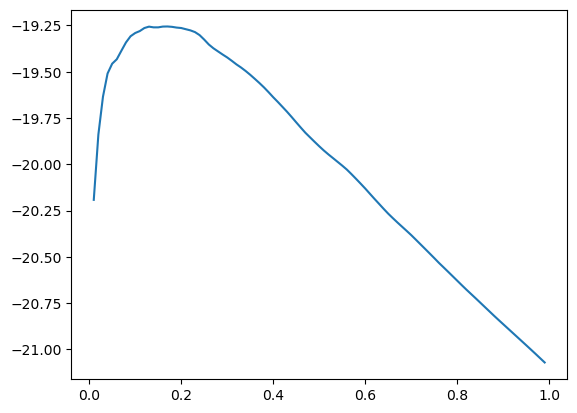

In [11]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,x_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)

In [12]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]
#little improvement

,alpha,error
16,0.17,-19.255621


### Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
np.mean(cross_val_score(rf,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-14.967951725375585

In [15]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV


In [22]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mae', 'friedman_mse', 'poisson'), 'max_features':(1.0,'sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

print(gs.best_score_)
print(gs.best_estimator_)

C:\Users\Hemu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
261 fits failed out of a total of 783.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
261 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hemu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hemu\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Hemu\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_p

-14.759990428822915
RandomForestRegressor(criterion='poisson', n_estimators=50)


#### Test ensembles

In [26]:
tpred_lm = lm.predict(x_test)
tpred_lml = ln_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lnl)
mean_absolute_error(y_test,tpred_rf)

10.923355704697986

In [28]:
### Combing the models
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)


14.264801582552714

In [ ]:
#pickling converts the object into a byte stream which can be stored,transfered,and converted back to orginal model at a later time 

Documentation for this:
This code saves a trained machine learning model to a file using Python's pickle module. Here's a breakdown of what each line of the code does:

import pickle: This line imports the pickle module, which is a Python module used for serializing and de-serializing Python objects.

pickl = {'model': gs.best_estimator_}: This line creates a dictionary called pickl that contains the trained machine learning model as one of its elements. The gs.best_estimator_ is an object that represents the best model found during the training process, which is typically determined using cross-validation.

pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) ): This line saves the pickl dictionary to a file called model_file.p in binary mode. The pickle.dump function serializes the pickl dictionary into bytes, which are then written to the file using the open function. The 'wb' parameter in the open function indicates that the file should be opened in binary write mode. The .p extension in the file name is a convention used to indicate that the file contains pickled data.

In [29]:
import pickle
pickl={'model':gs.best_estimator_}
pickle.dump(pickl,open('model_file'+".p","wb"))

In [32]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(x_test.iloc[1,:])).reshape(1,-1))[0]

list(x_test.iloc[1,:])

C:\Users\Hemu\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


### we are creating a flask environment here and work in it 
#### kindly Refer to the Kenjee video if you dont know about it

###instead of touch   
-echo. > app.py


https://towardsdatascience.com/creating-restful-apis-using-flask-and-python-655bad51b24